In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
dict_names_years = {}
for _ in range(1900, 2001):
    dict_names_years[_] = pd.read_csv('D:/Games/Anaconda3/Scripts/primer/name/yob{}.txt'.format(_), names=['Name', 'Male', 'Numbers'])
names = pd.concat(dict_names_years).reset_index(level=1, drop=True)


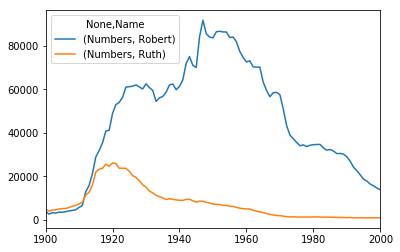

In [28]:
Ruth_Robert_name = names[names['Name'].isin(['Robert', 'Ruth'])]
Ruth_Robert_name = Ruth_Robert_name.groupby([Ruth_Robert_name.index, 'Name']).sum()
Ruth_Robert_name.unstack('Name').plot()

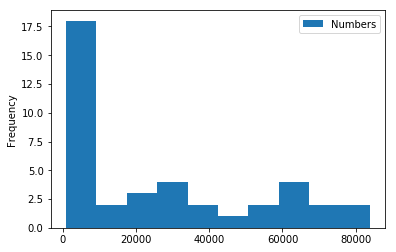

In [19]:
Ruth_Robert_name = names[names['Name'].isin(['Robert', 'Ruth'])]
Ruth_Robert_name = Ruth_Robert_name[Ruth_Robert_name.index.get_level_values(0).isin(range(1900, 2000, 5))]
Ruth_Robert_name = Ruth_Robert_name.groupby([Ruth_Robert_name.index, 'Name']).sum()
Ruth_Robert_name.plot(kind='hist', bins=10)

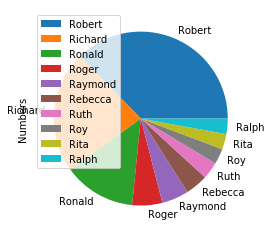

In [32]:
top_10_name = names[names['Name'].str[0] == 'R']
top_10_name = top_10_name[top_10_name.index == 1950]
top_10_name = top_10_name.groupby(['Name']).sum().sort_values('Numbers', ascending=False).head(10)
top_10_name.plot(kind='pie', y='Numbers')

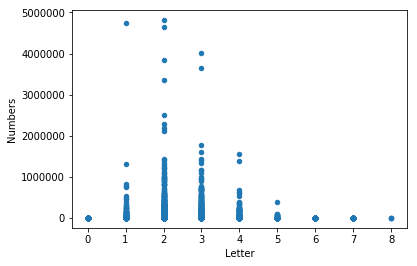

In [42]:
letters_in_name = names.groupby(['Name']).sum()
letters_in_name['Letter'] = sum(letters_in_name.index.str.count(letter) for letter in 'AEYUIOaeyuio')
letters_in_name.plot(kind='scatter', x='Letter', y='Numbers')